In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [11]:
data = pd.read_csv('data.csv')

In [13]:
pd

<module 'pandas' from 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

In [15]:
df = pd.DataFrame(data)

In [23]:
df


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


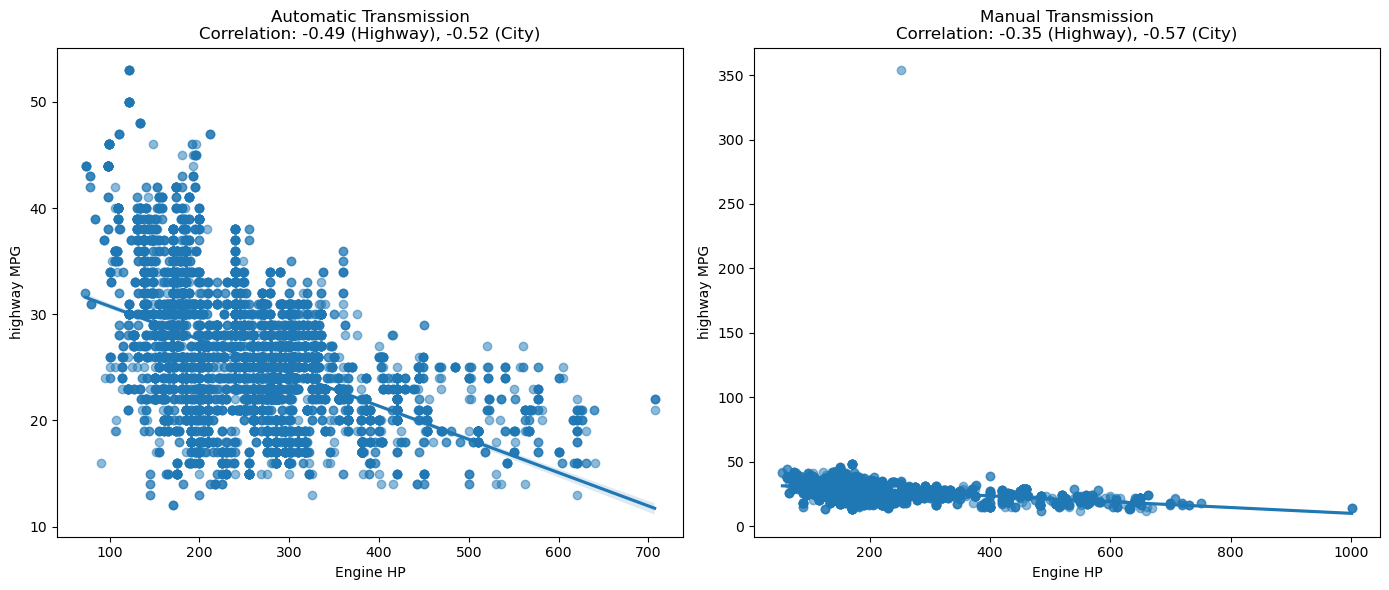

Automatic Transmission - Correlation between HP and Highway MPG: -0.4921518108369682
Automatic Transmission - Correlation between HP and City MPG: -0.519534810405673
Manual Transmission - Correlation between HP and Highway MPG: -0.3496873370065902
Manual Transmission - Correlation between HP and City MPG: -0.5723691954882721


In [21]:

# Step 1: Data Preparation - Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Engine HP', 'highway MPG', 'city mpg', 'Transmission Type', 'MSRP'])

# Step 2: Filtering Data based on Transmission Type
df_auto = df_clean[df_clean['Transmission Type'].str.contains('Automatic', case=False)]
df_manual = df_clean[df_clean['Transmission Type'].str.contains('Manual', case=False)]

# Step 3: Calculating Correlation
# For Automatic Transmission
correlation_auto_highway = df_auto['Engine HP'].corr(df_auto['highway MPG'])
correlation_auto_city = df_auto['Engine HP'].corr(df_auto['city mpg'])

# For Manual Transmission
correlation_manual_highway = df_manual['Engine HP'].corr(df_manual['highway MPG'])
correlation_manual_city = df_manual['Engine HP'].corr(df_manual['city mpg'])

# Step 4: Visualization
plt.figure(figsize=(14, 6))

# Correlation for Automatic
plt.subplot(1, 2, 1)
sns.regplot(x='Engine HP', y='highway MPG', data=df_auto, scatter_kws={'alpha':0.5})
plt.title(f'Automatic Transmission\nCorrelation: {correlation_auto_highway:.2f} (Highway), {correlation_auto_city:.2f} (City)')

# Correlation for Manual
plt.subplot(1, 2, 2)
sns.regplot(x='Engine HP', y='highway MPG', data=df_manual, scatter_kws={'alpha':0.5})
plt.title(f'Manual Transmission\nCorrelation: {correlation_manual_highway:.2f} (Highway), {correlation_manual_city:.2f} (City)')

plt.tight_layout()
plt.show()

# Output correlation values
print(f"Automatic Transmission - Correlation between HP and Highway MPG: {correlation_auto_highway}")
print(f"Automatic Transmission - Correlation between HP and City MPG: {correlation_auto_city}")
print(f"Manual Transmission - Correlation between HP and Highway MPG: {correlation_manual_highway}")
print(f"Manual Transmission - Correlation between HP and City MPG: {correlation_manual_city}")
